In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
import platform
import datetime

In [3]:
#  Setting Path to Dataset
if platform.system().lower().__contains__('windows'):
    BASE_PATH_TO_CODE_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Code Repository')+1])
    BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_CODE_REPOSITORY,'External_Datasets_for_All_Projects')
    TOPIC_CODE_NOTES_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'Individual_Topics_Code_Notes')
    # GREAT_LEARNING_NOTES_DATASET_PATH=os.path.join(TOPIC_CODE_NOTES_DATASETS,'Great Learning')
    TIME_SERIES_BASE_PATH=os.path.join(TOPIC_CODE_NOTES_DATASETS,'Time Series Forecasting')
elif platform.system().lower().__contains__('linux'):
    BASE_PATH_TO_CODE_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Code Repository')+1])
    BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_CODE_REPOSITORY,'External_Datasets_for_All_Projects')
    TOPIC_CODE_NOTES_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'Individual_Topics_Code_Notes')
    # GREAT_LEARNING_NOTES_DATASET_PATH=os.path.join(TOPIC_CODE_NOTES_DATASETS,'Great Learning')
    TIME_SERIES_BASE_PATH=os.path.join(TOPIC_CODE_NOTES_DATASETS,'Time Series Forecasting')
else:
    print('OS Error')

In [4]:
FILE_NAME=os.listdir(TIME_SERIES_BASE_PATH)[os.listdir(TIME_SERIES_BASE_PATH).index('airline-passengers.csv')]
FILE_NAME

'airline-passengers.csv'

In [5]:
PATH_TO_DATASET=os.path.join(TIME_SERIES_BASE_PATH, FILE_NAME)
PATH_TO_DATASET

'd:\\Artificial Intelligence\\Code Repository\\External_Datasets_for_All_Projects\\Individual_Topics_Code_Notes\\Time Series Forecasting\\airline-passengers.csv'

### Loading Dataset

In [20]:
dataset_airline_passenger=pd.read_csv(PATH_TO_DATASET)
dataset_airline_passenger.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
dataset_airline_passenger.columns

Index(['Month', 'Passengers'], dtype='object')

#### Convert Month to Date time index

In [31]:
date_info_datetime=[]
for i in dataset_airline_passenger['Month']:
    date_info=i.split('-')
    year,month=int(date_info[0].strip()), int(date_info[1].strip())
    complete_date=datetime.datetime(year, month, 1)
    date_info_datetime.append(complete_date)
dataset_airline_passenger['date_info']=np.array(date_info_datetime)
dataset_airline_passenger.set_index('date_info', inplace=True)

#### Plot the time series data to detect patterns

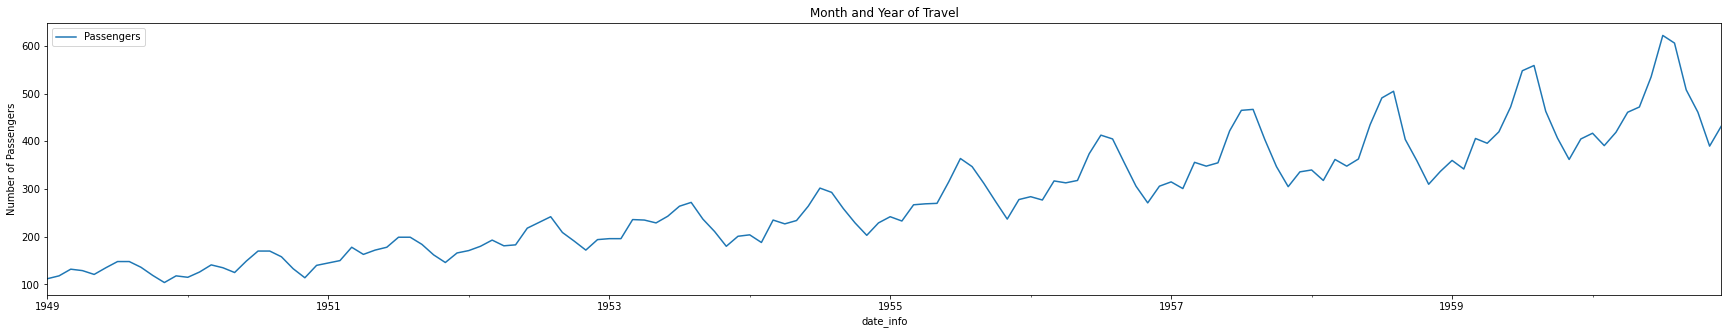

In [33]:
dataset_airline_passenger.plot(figsize=(30,5))
plt.ylabel('Number of Passengers')
plt.title('Month and Year of Travel')
plt.show()

### Identify Trend and Seasonality 

<ul> 
<li> Since the current dataset is constantly increasing, it has a strong sense of trend. </li>
<li> The graph has repeating crests and troughs. Hence it has a strong seasonality component</li>
</ul>

### Identify metrics for measuring trend and Seasonality

In [106]:
list_of_years=list(set(dataset_airline_passenger.index.year))
list_of_years.sort()

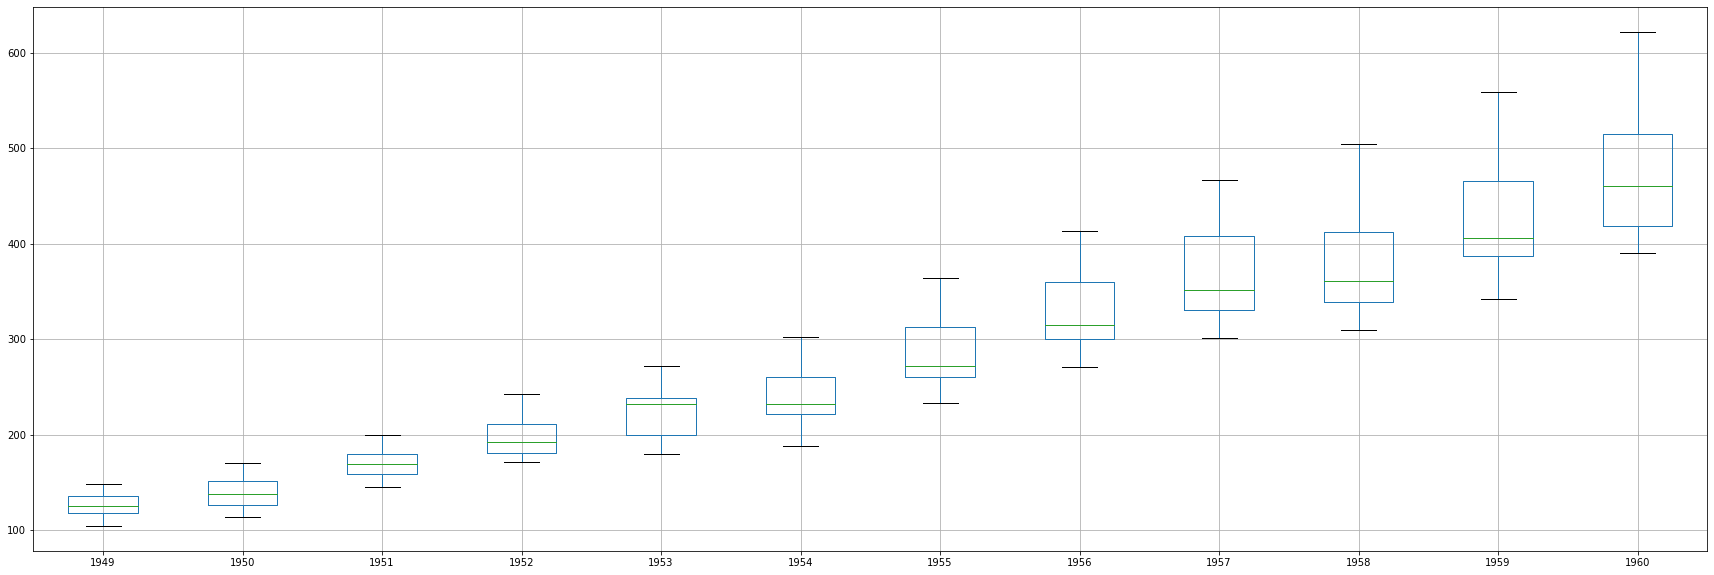

In [107]:
grouped_by_year = dataset_airline_passenger['Passengers'].groupby(pd.Grouper(freq='A')) 
annual_mean_passengers=[x[1].values for x in grouped_by_year]
annual_mean_passengers=pd.DataFrame(annual_mean_passengers, index=list_of_years).T
annual_mean_passengers.boxplot(figsize=(30,10))
plt.show()

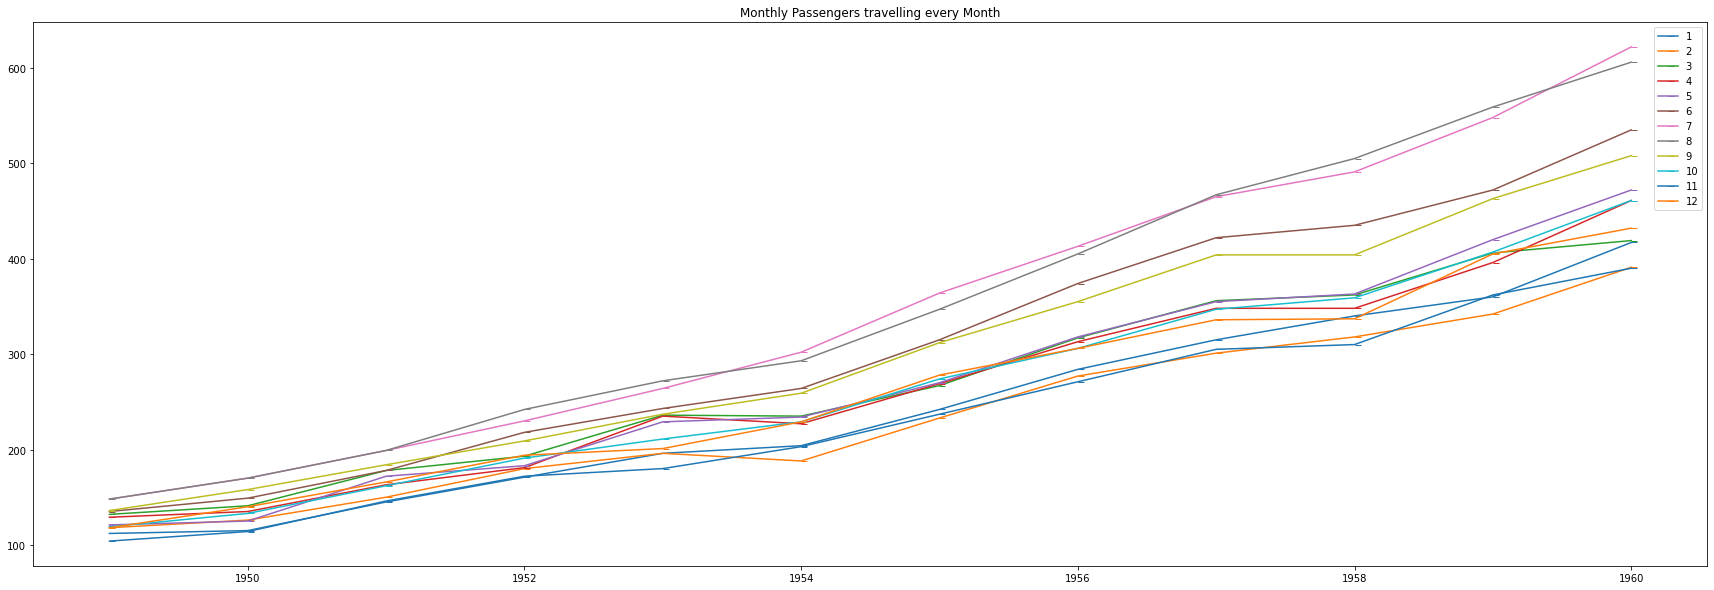

In [128]:
grouped_by_month = dataset_airline_passenger['Passengers'].groupby(pd.Grouper(freq='M')) 
monthly_mean_passengers={}
for x in grouped_by_month:
    if ((x[0].month)) in monthly_mean_passengers.keys():
            monthly_mean_passengers[(x[0].month)].append(x[1].values[0])
    else:
        monthly_mean_passengers[(x[0].month)]=[]
        monthly_mean_passengers[(x[0].month)].append(x[1].values[0])
monthly_mean_passengers=pd.DataFrame.from_dict(monthly_mean_passengers, columns=list_of_years,orient='index').T
# monthly_mean_passengers
monthly_mean_passengers.plot(figsize=(30,10), marker=True)
plt.title("Monthly Passengers travelling every Month")
plt.show()

### Decomposition of Time Series

In [130]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
import  statsmodels.api          as       sm

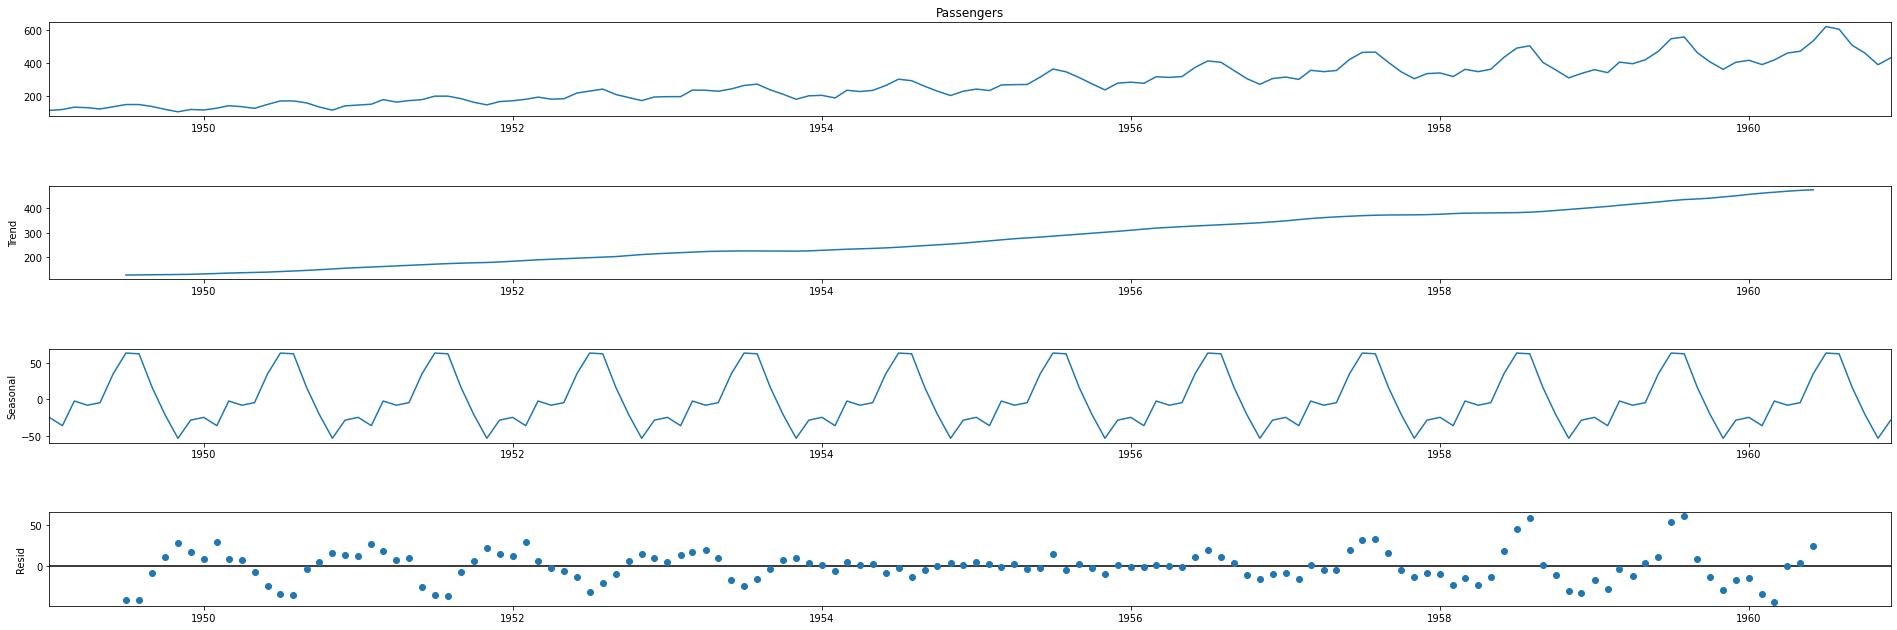

In [141]:
Passengers = sm.tsa.seasonal_decompose(dataset_airline_passenger.Passengers, model="additive")
fig=Passengers.plot()
fig.set_figwidth(30)
fig.set_figheight(10)
plt.show()
# plt.figure(figsize=(30,10))

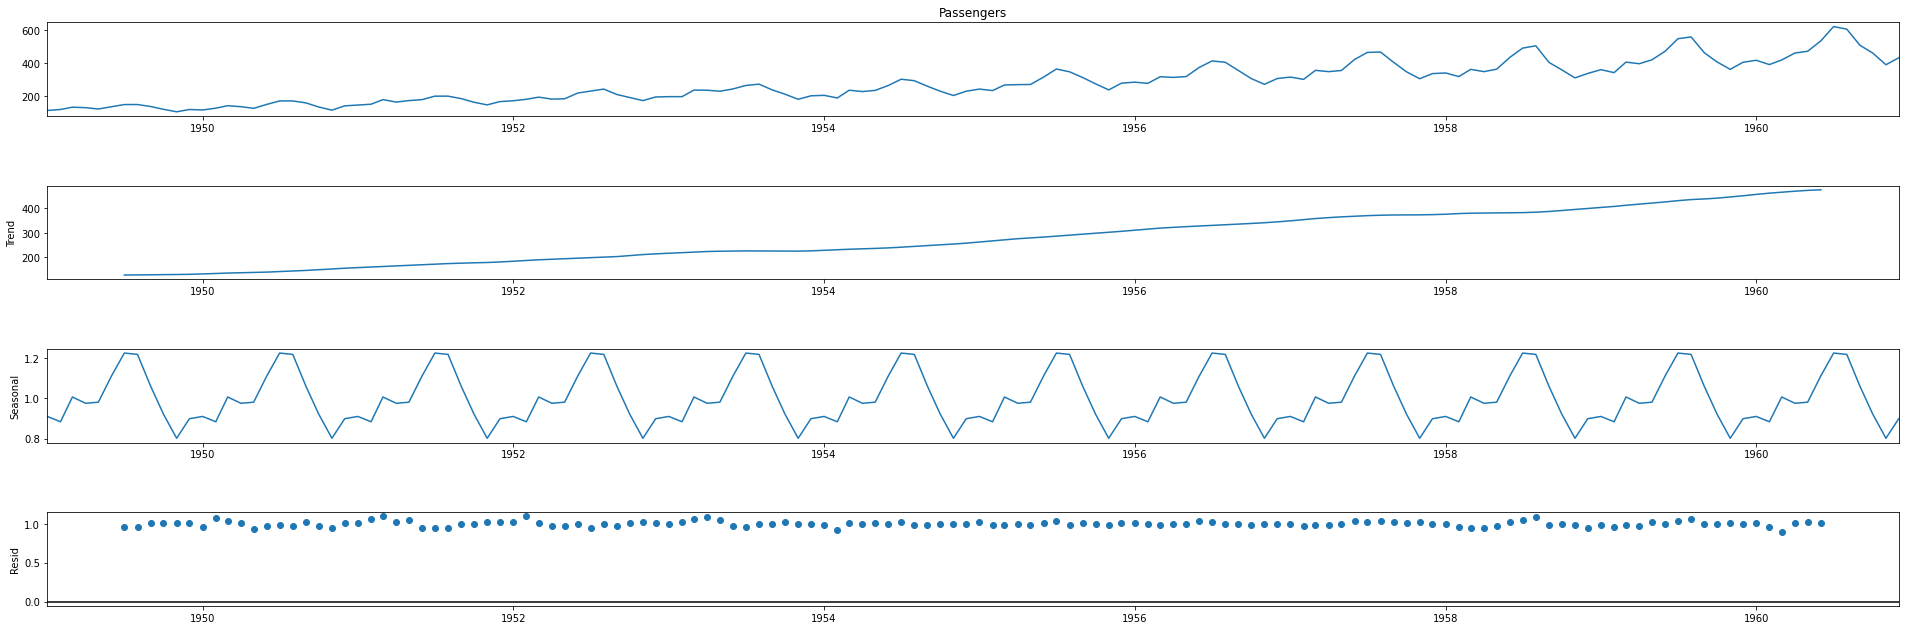

In [142]:
Passengers = sm.tsa.seasonal_decompose(dataset_airline_passenger.Passengers, model="multiplicative")
fig=Passengers.plot()
fig.set_figwidth(30)
fig.set_figheight(10)
plt.show()

### Saving Time Series Data in Pickle File